In [14]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets

# Regression DNN


In [15]:
# Membuat Data
x = np.array([1,2,3,4,5,6], dtype=float)
y = np.array([3,6,9,12,15,18], dtype=float)


# Membuat Squential Model

#### Membuat Arsitektur

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

#### Menconfigurasi Model

In [17]:
model.compile(optimizer='sgd', loss='mean_squared_error')

#### Melatih Model

In [34]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True

cb = myCallback()

model.fit(x,y, epochs=400, steps_per_epoch=19, callbacks=cb)

Epoch 1/400
19/19 [==============================] - 0s 2ms/step - loss: 9.5096e-05


# Mengambil Data Menist

In [41]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

In [42]:
print(y_train_raw[0])
print(x_train_raw.shape)
print(x_test_raw.shape)

5
(60000, 28, 28)
(10000, 28, 28)


# Encoding Lable

In [43]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


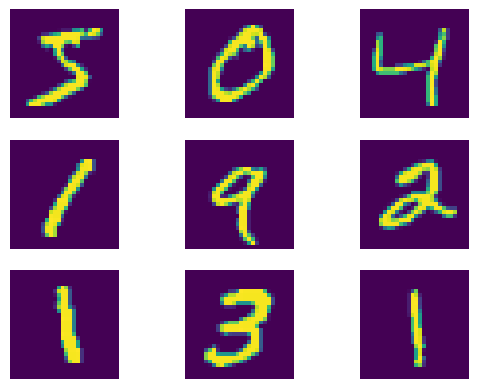

In [44]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [47]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 124)               31868     
                                                                 
 dense_10 (Dense)            (None, 128)               16000     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [50]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 9s 16ms/step - loss: 0.9673 - accuracy: 0.8908 - val_loss: 0.2701 - val_accuracy: 0.9335
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1738 - accuracy: 0.9516 - val_loss: 0.2155 - val_accuracy: 0.9408
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1161 - accuracy: 0.9660 - val_loss: 0.1648 - val_accuracy: 0.9542
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0926 - accuracy: 0.9721 - val_loss: 0.1395 - val_accuracy: 0.9642
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0852 - accuracy: 0.9751 - val_loss: 0.1229 - val_accuracy: 0.9649
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0794 - accuracy: 0.9766 - val_loss: 0.1499 - val_accuracy: 0.9615
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.1303 - val_accuracy: 0.9678

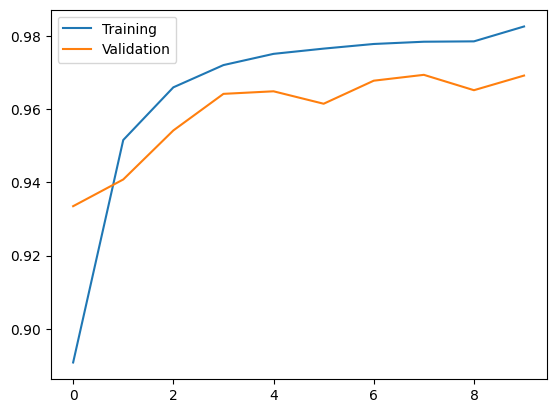

In [51]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

# Evaluasi dan Save Model

In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1297 - accuracy: 0.9692


[0.12974222004413605, 0.9692000150680542]

In [55]:
model.save('model/model_finished.h5')

In [56]:
model_saved = tf.keras.models.load_model('model/model_finished.h5')
model_saved.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 124)               31868     
                                                                 
 dense_10 (Dense)            (None, 128)               16000     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________
